In [184]:
from scipy.stats import binom,bernoulli,poisson,uniform
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


# Diffirent types of discrete probability distribution

## 1 . Binomial distribution

In [185]:
# Binomial Distribution describes the probability of getting a certain number of successes in a fixed number of independent trials 
# (where each trial has only two possible outcomes: SUCCESS=>p & FAILURE=>q)
# EX : coin toss -> (T OR H)
#      die roll ->(getting cetrain even OR not getting it)
# the key feature in the binomial distribution is repeting the trial n times and observing no.of success (K)
# The probability of getting exactly 𝑘 successes in 𝑛 trials = (n C k) * p^k * q ^1-k

In [186]:
# suppose loaded coin with p of head = .3 calc probability of getting 2 heads out of 5 trials
n = 5   # number of trials
p = 0.3 # probability of success
k = 2   # number of successes
binom.pmf(k, n, p)

0.3086999999999998

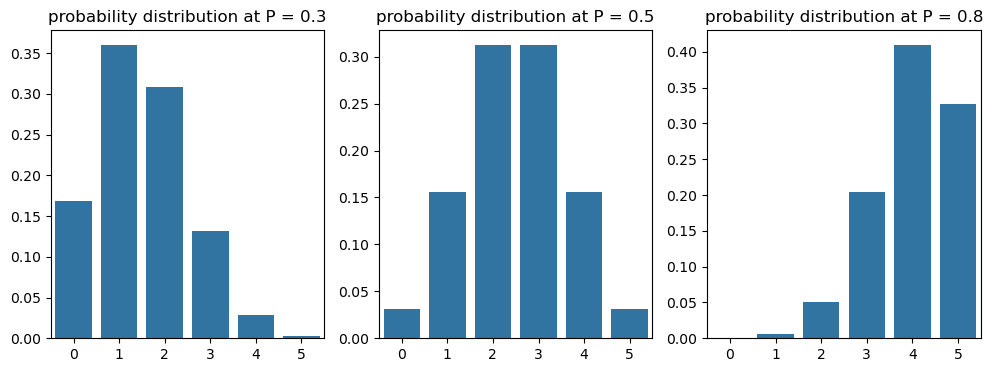

In [187]:
# to draw probability distribution list all possible times of heads after 5 trials
x = [0,1,2,3,4,5]
# the probability distribution varies dependently on the p
P_s = [0.3,0.5,0.8]
plt.figure(figsize=(12,4))
for i, P in enumerate(P_s, 1):
    plt.subplot(1,3,i)
    plt.title(f"probability distribution at P = {P}")
    y = binom.pmf(x, n, P)
    sns.barplot(x=x,y=y)

In [188]:
# properities of Binomial distribution 
p = 0.5
n = 5
mean = n * p
variance = n * p * (1-p)
mean_theoretical , variance_theoritically= binom.stats(n, p , moments='mv')

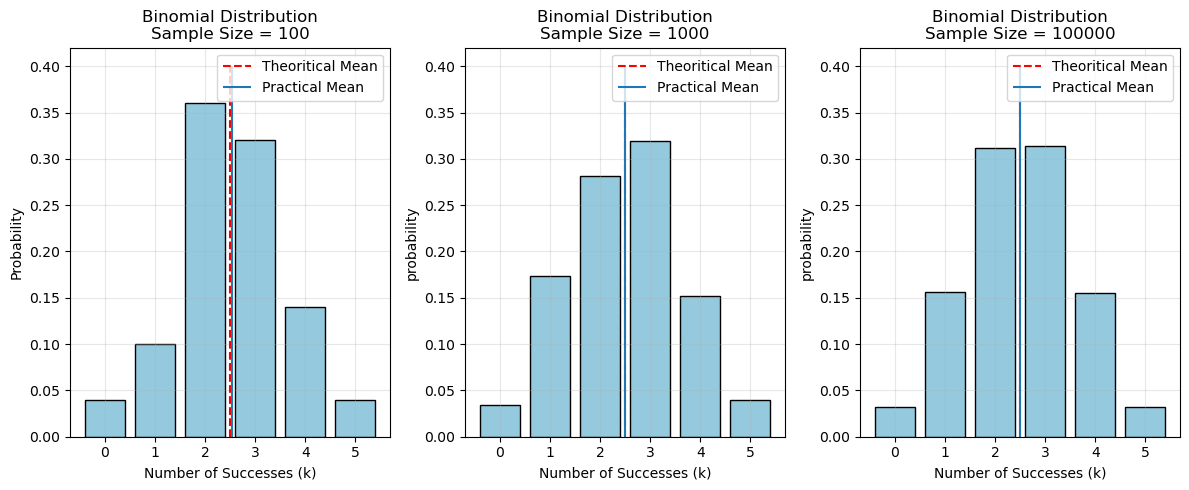

In [189]:
#generating Random Data following binomial distribution
p = 0.5
n = 5

sizes = [100, 1000, 100000]
plt.figure(figsize=(12,5))
for i, size in enumerate(sizes, 1):
    plt.subplot(1, 3, i)
    plt.title(f"Binomial Distribution\nSample Size = {size}", fontsize=12)
    # Generate random data
    data = np.random.binomial(n, p, size=size)
    sns.countplot(x=data, stat="probability", color="skyblue", edgecolor="black")
    
    # Plot theoretical Vs practical Mean  (red line)
    plt.vlines(binom.mean(n,p),ymin=0,ymax=0.4,colors='r',linestyles='--',label="Theoritical Mean",zorder=2)
    plt.vlines(data.mean(),ymin=0,ymax=0.4,label="Practical Mean")
    
    # Labels and grid
    plt.xlabel("Number of Successes (k)")
    if i == 1:
        plt.ylabel("Probability")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

## 2 . Bernolli distribution

In [190]:
# special case of Binomial where number of trials = 1
# all other features are applied

<Axes: ylabel='probability'>

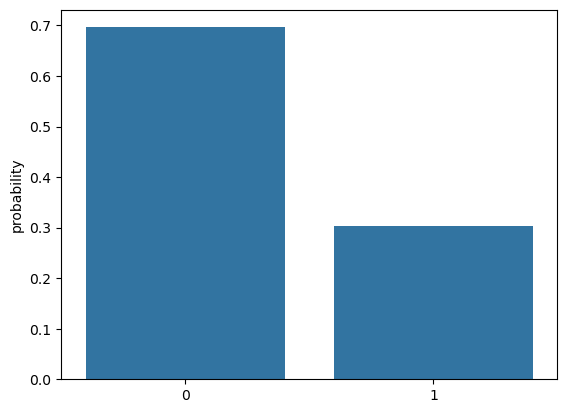

In [191]:
p=0.3
bernolli = bernoulli.rvs(p, size=10000)
sns.countplot(x=bernolli,stat="probability")


# 3.poisson distribution

<Axes: >

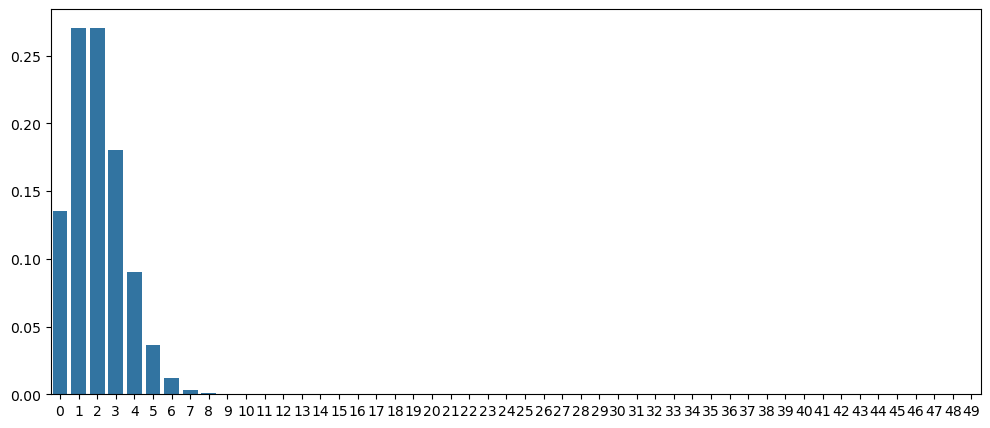

In [192]:
# describes the probability of a given number of events (k) occurring within a fixed interval of time (describes Rate)
# λ: mean number of events (the average rate)
# P (X=k)=e^−λ * λ^k /k!

# EX : average 2 student are arriving at the eating room in one minute
plt.figure(figsize=(12,5))
lambda_=2
x=np.arange(0,50)
y=poisson.pmf(x,lambda_)
sns.barplot(x=x,y=y)

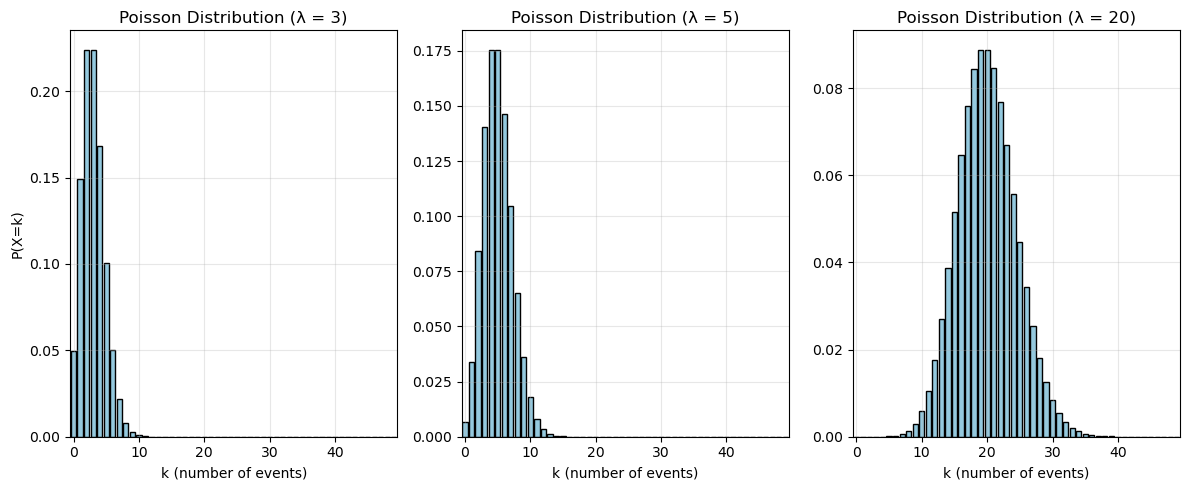

In [193]:
lambdas = [3, 5, 20]
plt.figure(figsize=(12,5))
for i, lam in enumerate(lambdas, 1):
    plt.subplot(1, 3, i)
    x = np.arange(0, 50)
    y = poisson.pmf(x, lam)
    sns.barplot(x=x, y=y, color='skyblue', edgecolor='black')
    plt.title(f"Poisson Distribution (λ = {lam})")
    plt.xlabel("k (number of events)")
    plt.ylabel("P(X=k)" if i == 1 else "")
    plt.grid(alpha=0.3)

    # Show only multiples of 10 on x-axis (no compression)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()
plt.show()

# 4.Uniform discrete distribution

In [194]:
# discrete probability distribution where all outcomes have the same probability
# ex :  Fair die
#       Not loaded coin

# mean = a+b / 2

theoritical mean = 3.5
practical mean = 3.50581


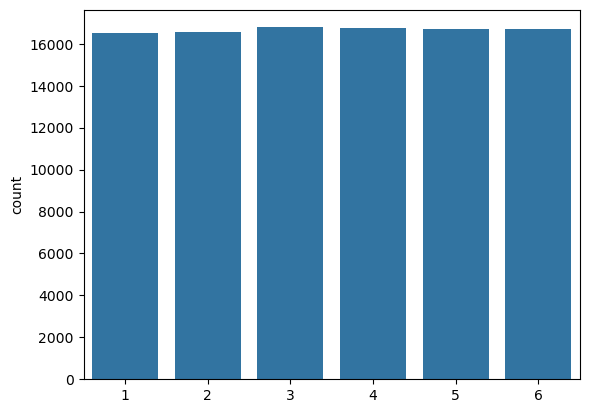

In [195]:
a, b = 1, 6  # range of dice
data = np.random.randint(a, b+1, size=100000)
sns.countplot(x=data)

print("theoritical mean =" , (a+b) /2 )
print("practical mean =" , data.mean())